In [1]:
import anndata
import pandas as pd
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
hic = anndata.read_h5ad("/home/micl/workspace/lmh_data/Lee2019/scHiC.h5ad")
hic

AnnData object with n_obs × n_vars = 4238 × 309581
    obs: 'domain'
    var: 'chrom', 'start'

In [4]:
hic.obs

,domain
cells,
190315_29yr_6_E11_AD008_ODC_10kb_contacts.cool,scHiC
181218_21yr_2_B11_AD002_Vip_10kb_contacts.cool,scHiC
190315_29yr_4_A3_AD006_L5_10kb_contacts.cool,scHiC
190315_21yr_6_F11_AD012_L23_10kb_contacts.cool,scHiC
181218_21yr_2_G12_AD010_MP_10kb_contacts.cool,scHiC
...,...
190305_21yr_2_H6_AD007_MP_10kb_contacts.cool,scHiC
190305_21yr_2_B1_AD001_OPC_10kb_contacts.cool,scHiC
190315_21yr_4_C7_AD010_Vip_10kb_contacts.cool,scHiC


In [5]:
hic.obs_names = hic.obs_names.str.split(r"[:_]").map(lambda x: '_'.join(x[:-2]))
hic.obs

,domain
cells,
190315_29yr_6_E11_AD008_ODC,scHiC
181218_21yr_2_B11_AD002_Vip,scHiC
190315_29yr_4_A3_AD006_L5,scHiC
190315_21yr_6_F11_AD012_L23,scHiC
181218_21yr_2_G12_AD010_MP,scHiC
...,...
190305_21yr_2_H6_AD007_MP,scHiC
190305_21yr_2_B1_AD001_OPC,scHiC
190315_21yr_4_C7_AD010_Vip,scHiC


In [6]:
hic_pca = pd.read_csv('/home/micl/workspace/lmh_data/Lee2019/BandNorm/embedding.txt', sep='\t')
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
181218_21yr_2_A1_AD002_L23.txt,890.902763,83.059109,10.409427,3.083012,-49.354259,-32.600687,14.483734,-18.205280,-41.147020,26.329468,...,-75.735664,-3.820232,36.103463,-27.970191,42.335609,-3.901578,82.587591,-25.758200,-22.978127,96.463360
181218_21yr_2_A1_AD004_L23.txt,904.872698,118.306720,-19.466440,-60.319205,-21.003638,18.145742,13.801854,47.763996,-68.598821,-5.905531,...,49.290660,-67.283106,63.113846,-103.293280,326.277678,169.548997,2.469605,53.261816,-125.220526,152.974825
181218_21yr_2_A1_AD006_L6.txt,919.593825,161.310310,-32.728456,-73.150546,-40.742312,-20.245419,7.219258,23.709505,-42.157936,31.101920,...,-115.939807,134.374472,-152.814060,99.921896,-232.474914,98.563518,-60.032190,-6.316850,-56.298253,279.926732
181218_21yr_2_A1_AD008_ODC.txt,847.266348,-202.626888,68.867497,3.661814,9.588173,18.015434,2.675589,-2.031951,-41.755522,-14.324155,...,-2.210585,-21.356662,31.221962,1.551080,10.824116,-24.044750,12.866632,-16.734417,-11.687963,10.222472
181218_21yr_2_A1_AD010_L5.txt,886.009912,56.243458,10.304221,17.604349,-15.108784,12.878859,24.463045,24.169183,-40.195791,15.401737,...,34.124152,-22.576417,32.882791,18.596894,3.256004,-26.359388,11.476817,19.178504,29.270071,52.927332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190315_29yr_6_H9_AD004_ODC.txt,875.749342,-54.474977,62.063033,-3.718579,-26.856854,0.777472,4.115779,11.823778,5.298375,4.900289,...,-11.239674,2.795996,-4.207720,8.334254,-3.466066,3.272328,13.226099,-7.189493,-6.957192,2.088942
190315_29yr_6_H9_AD006_ODC.txt,869.931323,-76.770471,74.170357,-15.045151,-13.061829,20.001922,1.833363,11.767611,-9.040591,-5.036546,...,6.593132,8.693434,0.491497,-0.642918,0.887359,-0.908937,3.024385,-4.100478,7.214831,-5.355590
190315_29yr_6_H9_AD008_L4.txt,912.004776,184.210110,-38.544711,23.696057,-12.341722,20.049228,-4.100016,16.438967,-12.954493,-6.911907,...,-1.795838,1.604240,5.245884,-0.446017,9.135502,4.044941,-9.760894,2.112579,4.890044,0.847785
190315_29yr_6_H9_AD010_Astro.txt,894.382651,66.583788,10.889655,43.946956,85.647281,-63.064850,15.228112,-24.624083,-2.974911,31.133385,...,-4.625787,-19.812551,-10.425295,16.577477,0.681416,-6.781128,-5.698107,1.316502,-2.404099,2.969823


In [7]:
hic_pca.index = hic_pca.index.str.split(".").map(lambda x: x[0])
hic_pca = hic_pca.loc[hic.obs.index]
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
cells,,,,,,,,,,,,,,,,,,,,,
190315_29yr_6_E11_AD008_ODC,871.781631,-72.333254,63.865209,-14.608258,-34.432074,9.476109,12.062783,9.782404,-21.597138,2.173983,...,1.046651,-17.042478,14.882015,-16.534655,1.391168,1.037403,0.538673,5.050615,-3.346549,-9.387006
181218_21yr_2_B11_AD002_Vip,899.521570,45.921524,24.171058,-49.777993,26.439545,22.897166,-15.028630,-20.633081,86.418502,7.517671,...,-20.367953,-41.389145,-14.781687,19.157262,-76.522537,25.832940,-19.830331,-19.379901,23.400929,-20.666634
190315_29yr_4_A3_AD006_L5,910.927240,176.876999,-52.440313,0.090915,-12.977546,14.780844,-3.253028,4.845430,-17.316657,-3.052136,...,1.430656,4.287518,-0.204909,5.015617,-5.961964,5.474950,6.702222,-5.824094,1.618371,-8.200665
190315_21yr_6_F11_AD012_L23,895.118014,113.303367,-10.757518,3.634128,-11.863942,21.572154,-18.377858,24.537773,-18.833498,-17.442221,...,-1.133421,7.014512,-2.394452,2.158924,-4.890967,-3.362944,12.538875,0.422184,16.263263,-0.436824
181218_21yr_2_G12_AD010_MP,858.744546,-225.178006,-95.737815,-36.902689,-7.173654,-26.212862,11.680092,-34.620812,-11.160733,12.925413,...,-8.080701,-5.339622,-5.127203,-28.472476,6.222498,35.060980,20.667730,-1.552784,8.225492,13.769378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190305_21yr_2_H6_AD007_MP,857.498332,-149.184302,-83.695044,-22.429992,-20.709749,-15.070855,8.958101,-7.510331,-34.261582,-36.159327,...,0.125220,16.544760,-9.807549,3.689828,-10.374477,-15.048891,-11.979496,5.252029,11.125054,3.911368
190305_21yr_2_B1_AD001_OPC,881.475294,-40.585908,40.154314,33.735235,51.666098,30.628314,-20.095340,10.426129,61.817539,-21.341536,...,-4.706073,-13.534714,4.893264,4.469470,-5.452570,6.212225,-1.512326,-2.814021,1.630196,-16.041625
190315_21yr_4_C7_AD010_Vip,900.474789,108.554408,-17.448108,39.083229,8.888875,44.529691,-28.568607,46.364711,71.446270,-17.628988,...,20.495377,-65.501270,-10.201661,-11.963391,-48.053869,-2.880644,-39.451852,0.294456,57.935249,23.469849


In [8]:
hic.obs["cell_type"] = hic.obs_names.str.split(r"[:_]").map(lambda x: x[5])
hic.obsm["X_pca"] = hic_pca
# .to_numpy()

del hic_pca; import gc; gc.collect();

In [9]:
hic = hic[hic.obs['cell_type'].isin(['Astro', 'Endo', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip']),:]
hic.obs

,domain,cell_type
cells,,
190315_29yr_6_E11_AD008_ODC,scHiC,ODC
181218_21yr_2_B11_AD002_Vip,scHiC,Vip
190305_21yr_2_B4_AD002_Vip,scHiC,Vip
190315_21yr_4_G1_AD012_Astro,scHiC,Astro
181218_21yr_2_G7_AD004_Astro,scHiC,Astro
...,...,...
181218_21yr_3_D5_AD010_Vip,scHiC,Vip
190315_21yr_6_G12_AD006_OPC,scHiC,OPC
190305_21yr_2_B1_AD001_OPC,scHiC,OPC


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


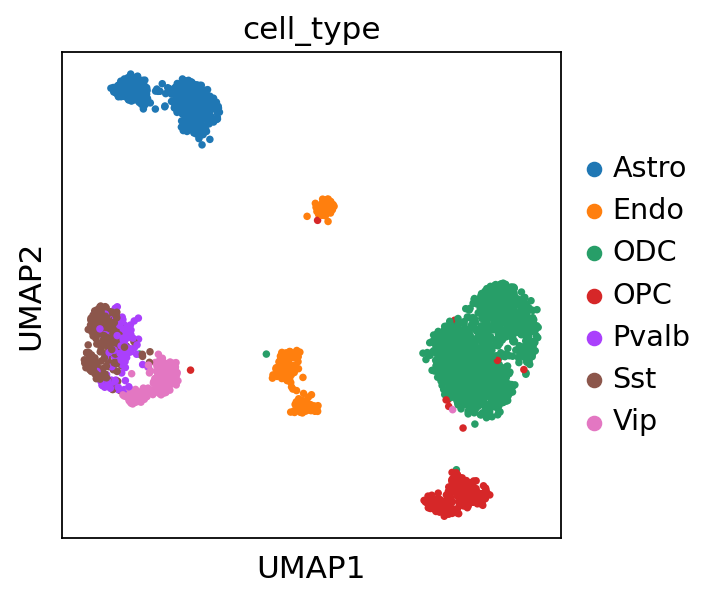

In [10]:
sc.pp.neighbors(hic, use_rep="X_pca", metric="cosine")
sc.tl.umap(hic)
sc.pl.umap(hic, color="cell_type")

In [11]:
rna = anndata.read_h5ad("/home/micl/workspace/lmh_data/Human_M1_10x/scRNA.h5ad")
rna.layers["counts"] = rna.X.copy()
rna

AnnData object with n_obs × n_vars = 22433 × 50281
    obs: 'cell_type', 'domain'
    layers: 'counts'

In [12]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

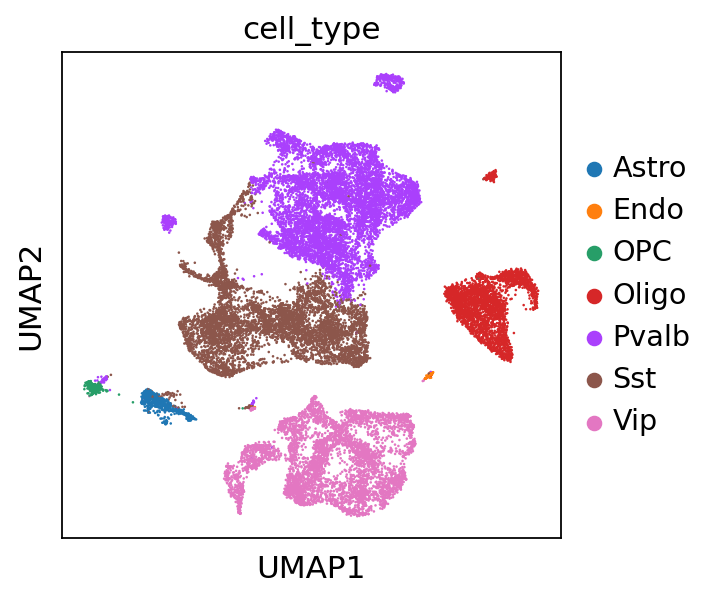

In [13]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="cell_type")

In [14]:
scglue.data.get_gene_annotation(
    rna, gtf="/home/micl/workspace/lmh_data/Human_M1_10x/rsem_GRCh38.p2.gtf",
    gtf_by="gene_symbol"
)
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
DDX11L1,NC_000001.11,11873,14409
WASH7P,NC_000001.11,14361,29370
MIR6859-1,NC_000001.11,17368,17436
MIR1302-2,NC_000001.11,30365,30503
FAM138A,NC_000001.11,34610,36081


In [15]:
rna.var['chrom'].unique()

array(['NC_000001.11', 'NC_000002.12', 'NC_000003.12', 'NC_000004.12',
       'NC_000005.10', 'NC_000006.12', 'NC_000007.14', 'NC_000008.11',
       'NC_000009.12', 'NC_000010.11', 'NC_000011.10', 'NC_000012.12',
       'NC_000013.11', 'NC_000014.9', 'NC_000015.10', 'NC_000016.10',
       'NC_000017.11', 'NC_000018.10', 'NC_000019.10', 'NC_000020.11',
       'NC_000021.9', 'NC_000022.11', 'NC_000023.11', 'NC_000024.10',
       'NC_012920.1'], dtype=object)

In [16]:
def chrom_map(chrom):
    _map = {
        'NC_000001': 'chr1', 'NC_000002': 'chr2', 'NC_000003': 'chr3', 'NC_000004': 'chr4', 'NC_000005': 'chr5',
        'NC_000006': 'chr6', 'NC_000007': 'chr7', 'NC_000008': 'chr8', 'NC_000009': 'chr9', 'NC_000010': 'chr10',
        'NC_000011': 'chr11', 'NC_000012': 'chr12', 'NC_000013': 'chr13', 'NC_000014': 'chr14', 'NC_000015': 'chr15',
        'NC_000016': 'chr16', 'NC_000017': 'chr17', 'NC_000018': 'chr18', 'NC_000019': 'chr19', 'NC_000020': 'chr20',
        'NC_000021': 'chr21', 'NC_000022': 'chr22', 'NC_000023': 'chrX', 'NC_000024': 'chrY', 'NC_012920': 'chrM'
    }
    if chrom in _map.keys():
        return _map[chrom]
    return chrom

rna.var.chrom = rna.var.chrom.str.split(r"[:.]").map(lambda x: chrom_map(x[0]))
rna.var

,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,gene_id
DDX11L1,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,11873,14409,DDX11L1,.,+,.,.,.,.,.,.,100287102
WASH7P,False,NaN,0.013284,0.013376,0.903725,0.008569,0.084100,chr1,14361,29370,WASH7P,.,-,.,.,.,.,.,.,653635
MIR6859-1,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,17368,17436,MIR6859-1,.,-,.,.,.,.,.,.,102466751
MIR1302-2,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,30365,30503,MIR1302-2,.,+,.,.,.,.,.,.,100302278
FAM138A,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,34610,36081,FAM138A,.,-,.,.,.,.,.,.,645520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND6,True,1128.0,0.026301,0.051109,1.680605,0.015903,0.118004,chrM,14148,14673,ND6,.,-,.,.,.,.,.,.,4541
TRNE,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chrM,14673,14742,TRNE,.,-,.,.,.,.,.,.,4556
CYTB,True,96.0,5.364418,138.183037,4.650733,1.299554,1.010418,chrM,14746,15887,CYTB,.,+,.,.,.,.,.,.,4519
TRNT,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chrM,15887,15953,TRNT,.,+,.,.,.,.,.,.,4576


In [17]:
hic.var

,chrom,start
chr1_0,chr1,0
chr1_10000,chr1,10000
chr1_20000,chr1,20000
chr1_30000,chr1,30000
chr1_40000,chr1,40000
...,...,...
chrY_59330000,chrY,59330000
chrY_59340000,chrY,59340000
chrY_59350000,chrY,59350000
chrY_59360000,chrY,59360000


In [18]:
hic.var = hic.var.rename(columns={'start':'chromStart'})
hic.var['chromEnd'] = hic.var['chromStart'] + 10000
hic.var

,chrom,chromStart,chromEnd
chr1_0,chr1,0,10000
chr1_10000,chr1,10000,20000
chr1_20000,chr1,20000,30000
chr1_30000,chr1,30000,40000
chr1_40000,chr1,40000,50000
...,...,...,...
chrY_59330000,chrY,59330000,59340000
chrY_59340000,chrY,59340000,59350000
chrY_59350000,chrY,59350000,59360000
chrY_59360000,chrY,59360000,59370000


In [19]:
import itertools
import networkx as nx

rna_bed = scglue.genomics.Bed(rna.var.assign(name=rna.var_names))
hic_bed = scglue.genomics.Bed(hic.var.assign(name=hic.var_names))

# hic_bed = hic_bed.expand(2000, 0)
def _dist_power_decay(x: int) -> float:
    return ((x + 10000) / 10000) ** (-0.75)

graph = scglue.genomics.window_graph(
    hic_bed, rna_bed, window_size=0,
    attr_fn=lambda l, r, d, s=1: {
        "dist": abs(d), "weight": _dist_power_decay(abs(d)), "sign": s
    }
)

rgraph = graph.reverse()
nx.set_edge_attributes(graph, "fwd", name="type")
nx.set_edge_attributes(rgraph, "rev", name="type")
graph = scglue.graph.compose_multigraph(graph, rgraph)

hvg_reachable = scglue.graph.reachable_vertices(graph, rna.var.query("highly_variable").index)
hic.var["highly_variable"] = [
    item in hvg_reachable for item in hic.var_names
]

all_features = set(itertools.chain.from_iterable(
    map(lambda x: x.var_names, [rna, hic])
))
for item in all_features:
    graph.add_edge(item, item, weight=1.0, sign=1, type="loop")

  0%|          | 0/309581 [00:00<?, ?it/s]

In [20]:
# def _dist_power_decay(x: int) -> float:
#     return ((x + 10000) / 10000) ** (-0.75)

# graph = scglue.genomics.rna_anchored_prior_graph(rna, hic, extend_fn=_dist_power_decay)
# graph

In [21]:
# test_hic = hic[:,hic.var['highly_variable']==True]
# test_hic

In [22]:
# sc.pp.highly_variable_genes(test_hic, n_top_genes=2000, flavor="seurat_v3")
# sc.pp.normalize_total(test_hic)
# sc.pp.log1p(test_hic)
# sc.pp.scale(test_hic)
# sc.tl.pca(test_hic, n_comps=100, svd_solver="auto")

In [23]:
# sc.pp.neighbors(test_hic, metric="cosine")
# sc.tl.umap(test_hic)
# sc.pl.umap(test_hic, color="cell_type")

In [24]:
graph.number_of_nodes(), graph.number_of_edges()

(359862, 802364)

In [25]:
all(graph.has_node(gene) for gene in rna.var_names), \
all(graph.has_node(peak) for peak in hic.var_names), \
all(graph.has_edge(gene, gene) for gene in rna.var_names), \
all(graph.has_edge(peak, peak) for peak in hic.var_names), \
all(graph.has_edge(j, i) for i, j, _ in graph.edges)

(True, True, True, True, True)

In [26]:
hic.var.head()

,chrom,chromStart,chromEnd,highly_variable
chr1_0,chr1,0,10000,False
chr1_10000,chr1,10000,20000,False
chr1_20000,chr1,20000,30000,False
chr1_30000,chr1,30000,40000,False
chr1_40000,chr1,40000,50000,False


In [27]:
# rna.write("/home/micl/workspace/lmh_data/sclab/rna_preprocessed.h5ad", compression="gzip")
# hic.write("/home/micl/workspace/lmh_data/sclab/hic_preprocessed.h5ad", compression="gzip")
# nx.write_graphml(graph, "/home/micl/workspace/lmh_data/sclab/prior.graphml.gz")

In [28]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

_graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, _graph,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 0 as computation device.
[INFO] SCGLUEModel: Setting `graph_batch_size` = 45996
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.668, 'g_kl': 0.006, 'g_elbo': 0.674, 'x_rna_nll': 0.624, 'x_rna_kl': 0.018, 'x_rna_elbo': 0.643, 'x_hic_nll': 2.786, 'x_hic_kl': 0.002, 'x_hic_elbo': 2.788, 'dsc_loss': 0.627, 'vae_loss': 3.458, 'gen_loss': 3.426}, val={'g_nll': 0.665, 'g_kl': 0.006, 'g_elbo': 0.67, 'x_rna_nll': 0.618, 'x_rna_kl': 0.018, 'x_rna_elbo': 0.636, 'x_hic_nll': 2.79, 'x_hic_kl': 0.002, 'x_hic_elbo': 2.791, 'dsc_loss': 0.601, 'vae_loss': 3.454, 'gen_loss': 3.424}, 24.1s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.6, 'g_kl': 0.006, 'g_elbo': 0.607, 'x_rna_nll': 0.616, 'x_rna_kl': 0.02, 'x_

2022-06-23 02:28:50,122 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "36"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (37, 12)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 45996
[INFO] SCGLUEModel: Setting `align_burnin` = 23
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.521, 'g_kl': 0.006, 'g_elbo': 0.527, 'x_rna_nll': 0.615, 'x_rna_kl': 0.02, 'x_rna_elbo': 0.635, 'x_hic_nll': 2.775, 'x_hic_kl': 0.002, 'x_hic_elbo': 2.776, 'dsc_loss': 0.65, 'vae_loss': 3.432, 'gen_loss': 3.4}, val={'g_nll': 0.519, 'g_kl': 0.006,

2022-06-23 02:56:12,491 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "60"...
